In [1]:
!pip install statsbombpy

In [3]:
import pandas as pd
import numpy as np
from statsbombpy import sb

In [5]:
competitions_df = sb.competitions()

C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [7]:
competitions_df.shape

(75, 12)

In [9]:
competitions_df.columns.values

array(['competition_id', 'season_id', 'country_name', 'competition_name',
       'competition_gender', 'competition_youth',
       'competition_international', 'season_name', 'match_updated',
       'match_updated_360', 'match_available_360', 'match_available'],
      dtype=object)

In [11]:
competitions_df.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-09-28T20:46:38.893391,2025-07-06T04:26:07.636270,2025-07-06T04:26:07.636270,2024-09-28T20:46:38.893391
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-09-28T01:57:35.846538,None,None,2024-09-28T01:57:35.846538
3,16,4,Europe,Champions League,male,False,False,2018/2019,2025-05-08T15:10:50.835274,2021-06-13T16:17:31.694,None,2025-05-08T15:10:50.835274
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882


In [13]:
matches_df = sb.matches()

TypeError: matches() missing 2 required positional arguments: 'competition_id' and 'season_id'

In [15]:
print(competitions_df[['competition_id', 'competition_name', 'season_id', 'season_name']].to_string())

    competition_id         competition_name  season_id season_name
0                9            1. Bundesliga        281   2023/2024
1                9            1. Bundesliga         27   2015/2016
2             1267   African Cup of Nations        107        2023
3               16         Champions League          4   2018/2019
4               16         Champions League          1   2017/2018
5               16         Champions League          2   2016/2017
6               16         Champions League         27   2015/2016
7               16         Champions League         26   2014/2015
8               16         Champions League         25   2013/2014
9               16         Champions League         24   2012/2013
10              16         Champions League         23   2011/2012
11              16         Champions League         22   2010/2011
12              16         Champions League         21   2009/2010
13              16         Champions League         41   2008/

In [17]:
competitions_df.groupby('competition_id')['competition_name'].first().reset_index()

,competition_id,competition_name
0,2,Premier League
1,7,Ligue 1
2,9,1. Bundesliga
3,11,La Liga
4,12,Serie A
5,16,Champions League
6,35,UEFA Europa League
7,37,FA Women's Super League
8,43,FIFA World Cup
9,44,Major League Soccer


In [19]:
competitions_df.isnull().sum()

competition_id                0
season_id                     0
country_name                  0
competition_name              0
competition_gender            0
competition_youth             0
competition_international     0
season_name                   0
match_updated                 0
match_updated_360            18
match_available_360          64
match_available               0
dtype: int64

In [21]:
competitions_df.groupby(['competition_id', 'competition_name'])['match_available_360'].apply(lambda x: x.isnull().sum()).reset_index()

,competition_id,competition_name,match_available_360
0,2,Premier League,2
1,7,Ligue 1,1
2,9,1. Bundesliga,1
3,11,La Liga,17
4,12,Serie A,2
5,16,Champions League,18
6,35,UEFA Europa League,1
7,37,FA Women's Super League,3
8,43,FIFA World Cup,7
9,44,Major League Soccer,0


In [23]:
competitions_df.loc[competitions_df['competition_id'] == 55,
                    ['season_id', 'season_name']].drop_duplicates()

,season_id,season_name
68,282,2024
69,43,2020


# I'm choosing Euro 2024 since it has no null data.

# I'm going to perform an analysis and comparison between the playing styles of Rodri Hernández and Declan Rice.

In [26]:
matches_df = sb.matches(competition_id=55, season_id=282)

C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [28]:
matches_df.shape

(51, 22)

In [30]:
matches_df.columns.values

array(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score',
       'match_status', 'match_status_360', 'last_updated',
       'last_updated_360', 'match_week', 'competition_stage', 'stadium',
       'referee', 'home_managers', 'away_managers', 'data_version',
       'shot_fidelity_version', 'xy_fidelity_version'], dtype=object)

In [32]:
matches_df.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,...,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,...,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,...,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
4,3942349,2024-07-05,22:00:00.000,Europe - UEFA Euro,2024,Portugal,France,0,0,available,...,2024-07-12T02:00:16.871522,5,Quarter-finals,Volksparkstadion,Michael Oliver,Roberto Martínez Montoliú,Didier Deschamps,1.1.0,2,2


In [34]:
total_events = []

for i, match_id in enumerate(matches_df['match_id']):
    try:
        events_match = sb.events(match_id=match_id)
        events_match['match_id'] = match_id
        total_events.append(events_match)

        print(f"Partido {i+1}/{len(matches_df)}: {match_id} - {len(events_match)} eventos")

    except Exception as e:
        print(f"Error en partido {match_id}: {e}")

events_df = pd.concat(total_events, ignore_index=True)

C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 1/51: 3942819 - 3485 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 2/51: 3943043 - 3312 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 3/51: 3942752 - 3328 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 4/51: 3942382 - 3415 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 5/51: 3942349 - 5190 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 6/51: 3930180 - 3198 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 7/51: 3930171 - 3881 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 8/51: 3942227 - 4882 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 9/51: 3942226 - 4463 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 10/51: 3938645 - 3525 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 11/51: 3930184 - 2953 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 12/51: 3941022 - 3722 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 13/51: 3941021 - 2996 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 14/51: 3941020 - 4221 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 15/51: 3941019 - 3941 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 16/51: 3941018 - 3949 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 17/51: 3941017 - 4764 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 18/51: 3930182 - 3787 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 19/51: 3930179 - 3776 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 20/51: 3940983 - 3640 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 21/51: 3940878 - 3853 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 22/51: 3930177 - 3386 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 23/51: 3930173 - 3681 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 24/51: 3930172 - 3982 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 25/51: 3930167 - 3721 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 26/51: 3930168 - 3880 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 27/51: 3930165 - 3718 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 28/51: 3930164 - 3543 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 29/51: 3930161 - 4066 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 30/51: 3938637 - 3401 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 31/51: 3938640 - 3512 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 32/51: 3938642 - 3332 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 33/51: 3938639 - 3837 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 34/51: 3938641 - 3400 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 35/51: 3938644 - 3659 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 36/51: 3938643 - 3767 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 37/51: 3938638 - 3169 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 38/51: 3930183 - 2886 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 39/51: 3930181 - 3688 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 40/51: 3930178 - 4006 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 41/51: 3930176 - 3724 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 42/51: 3930175 - 3200 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 43/51: 3930174 - 3786 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 44/51: 3930170 - 3552 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 45/51: 3930169 - 3125 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 46/51: 3930166 - 3602 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 47/51: 3930163 - 3920 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 48/51: 3930162 - 3509 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 49/51: 3930160 - 3796 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 50/51: 3930159 - 3356 eventos


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partido 51/51: 3930158 - 3373 eventos


In [35]:
events_df.shape

(187858, 114)

In [36]:
events_df.columns.values

array(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'block_deflection', 'block_save_block', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_outcome', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_punched_out',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part',
       'pass_cross', 'pass_cut_back', 'pass_deflected',
       'pass_end_location', 'pass_goa

In [37]:
events_filtered = events_df[events_df['team'].isin(['Spain', 'England'])]

In [38]:
events_filtered.shape

(30115, 114)

In [39]:
events_filtered.isnull().sum()

50_50                               30077
bad_behaviour_card                  30110
ball_receipt_outcome                29351
block_deflection                    30110
block_save_block                    30114
                                    ...  
goalkeeper_penalty_saved_to_post    30115
goalkeeper_shot_saved_off_target    30114
shot_follows_dribble                30115
shot_saved_off_target               30113
shot_redirect                       30115
Length: 114, dtype: int64

In [40]:
events_filtered.columns.values

array(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'block_deflection', 'block_save_block', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_outcome', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_punched_out',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part',
       'pass_cross', 'pass_cut_back', 'pass_deflected',
       'pass_end_location', 'pass_goa

In [41]:
rice_events = events_filtered[
    events_filtered['player'].isin(['Declan Rice'])
]

print(f"Total Rice events: {len(rice_events)}")

print(rice_events['type'].value_counts())

Total Rice events: 1671
type
Pass               536
Ball Receipt*      468
Carry              443
Pressure            82
Ball Recovery       40
Duel                24
Block               11
Shot                 9
Clearance            9
Interception         8
Foul Committed       8
Dispossessed         7
Dribble              6
Foul Won             5
Miscontrol           5
50/50                5
Dribbled Past        3
Injury Stoppage      2
Name: count, dtype: int64


In [42]:
rodri_events = events_filtered[
    events_filtered['player'].isin(['Rodrigo Hernández Cascante'])
]

print(f"Total Rodri events: {len(rodri_events)}")

print(rodri_events['type'].value_counts())

Total Rodri events: 1373
type
Pass               436
Ball Receipt*      382
Carry              355
Pressure            89
Ball Recovery       28
Duel                15
Block               12
Clearance           12
Foul Committed       8
Foul Won             7
Shot                 5
Dribbled Past        4
Dribble              3
Interception         3
50/50                3
Miscontrol           3
Injury Stoppage      3
Dispossessed         2
Substitution         2
Bad Behaviour        1
Name: count, dtype: int64


In [52]:
rodri_events.shape

(1373, 114)

In [54]:
rodri_events.columns.values

array(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'block_deflection', 'block_save_block', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_outcome', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_punched_out',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part',
       'pass_cross', 'pass_cut_back', 'pass_deflected',
       'pass_end_location', 'pass_goa

In [56]:
rodri_events['type'].unique()

array(['Pass', 'Ball Receipt*', 'Carry', 'Pressure', 'Block', 'Duel',
       'Ball Recovery', 'Clearance', 'Dribbled Past', 'Foul Committed',
       'Substitution', 'Dribble', 'Interception', '50/50', 'Miscontrol',
       'Foul Won', 'Shot', 'Injury Stoppage', 'Dispossessed',
       'Bad Behaviour'], dtype=object)

In [58]:
rodri_events.isnull().sum()

50_50                               1370
bad_behaviour_card                  1372
ball_receipt_outcome                1362
block_deflection                    1372
block_save_block                    1373
                                    ... 
goalkeeper_penalty_saved_to_post    1373
goalkeeper_shot_saved_off_target    1373
shot_follows_dribble                1373
shot_saved_off_target               1373
shot_redirect                       1373
Length: 114, dtype: int64

In [59]:
matches_spain_england = matches_df[
    (matches_df['home_team'].isin(['Spain', 'England'])) |
    (matches_df['away_team'].isin(['Spain', 'England']))
]

In [60]:
frames_360_list = []

for match_id in matches_spain_england['match_id']:
    try:
        frames_360 = sb.frames(match_id=match_id)
        frames_360['match_id'] = match_id
        frames_360_list.append(frames_360)
        print(f"360: {match_id}")
    except Exception as e:
        print(f"Error: {match_id} - {e}")

frames_360_df = pd.concat(frames_360_list, ignore_index=True)

C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


360: 3942819


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


360: 3943043


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


360: 3942752


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


360: 3930171


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


360: 3942227


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


360: 3942226


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


360: 3941018


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


360: 3941017


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


360: 3930179


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


360: 3930172


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


360: 3930181


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


360: 3930163


C:\Users\nicol\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


360: 3930160


In [61]:
frames_360_df.shape

(739979, 7)

In [62]:
frames_360_df.columns.values

array(['id', 'visible_area', 'match_id', 'teammate', 'actor', 'keeper',
       'location'], dtype=object)

In [68]:
frames_360_df.head()

,id,visible_area,match_id,teammate,actor,keeper,location
0,25dfc952-7a85-464f-b884-982064d46cc9,"[82.05880352279489, 80.0, 37.469993200629204, ...",3942819,True,False,True,"[22.697541663925428, 41.01277368603656]"
1,25dfc952-7a85-464f-b884-982064d46cc9,"[82.05880352279489, 80.0, 37.469993200629204, ...",3942819,True,False,False,"[46.54665402564941, 46.65992069066397]"
2,25dfc952-7a85-464f-b884-982064d46cc9,"[82.05880352279489, 80.0, 37.469993200629204, ...",3942819,True,False,False,"[47.44522057974756, 64.52929870627902]"
3,25dfc952-7a85-464f-b884-982064d46cc9,"[82.05880352279489, 80.0, 37.469993200629204, ...",3942819,True,False,False,"[48.81954571089864, 35.810976155696935]"
4,25dfc952-7a85-464f-b884-982064d46cc9,"[82.05880352279489, 80.0, 37.469993200629204, ...",3942819,True,False,False,"[49.74595437091587, 27.859841158806844]"


In [70]:
rodri_events.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,goalkeeper_success_in_play,ball_recovery_offensive,dribble_no_touch,pass_miscommunication,player_off_permanent,goalkeeper_penalty_saved_to_post,goalkeeper_shot_saved_off_target,shot_follows_dribble,shot_saved_off_target,shot_redirect
3501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
rice_events.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,goalkeeper_success_in_play,ball_recovery_offensive,dribble_no_touch,pass_miscommunication,player_off_permanent,goalkeeper_penalty_saved_to_post,goalkeeper_shot_saved_off_target,shot_follows_dribble,shot_saved_off_target,shot_redirect
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
rodri_passes = rodri_events[rodri_events['type'] == 'Pass'].copy()

rice_passes = rice_events[rice_events['type'] == 'Pass'].copy()

In [76]:
rodri_passes['pass_end_location'].describe()

count              436
unique             436
top       [26.1, 60.7]
freq                 1
Name: pass_end_location, dtype: object

In [78]:
rice_passes['pass_end_location'].describe()

count              536
unique             535
top       [45.9, 57.2]
freq                 2
Name: pass_end_location, dtype: object

In [79]:
df_rodri_passes_por_partido = (
    rodri_passes.groupby('match_id')
    .size()
    .reset_index(name='Total_Passes')
)

df_rodri_passes_por_partido.head(10)

,match_id,Total_Passes
0,3930160,63
1,3930172,95
2,3941018,117
3,3942226,73
4,3942752,56
5,3943043,32


In [80]:
df_rice_passes_por_partido = (
    rice_passes.groupby('match_id')
    .size()
    .reset_index(name='Total_Passes')
)

df_rice_passes_por_partido.head(10)

,match_id,Total_Passes
0,3930163,82
1,3930171,66
2,3930181,60
3,3941017,93
4,3942227,98
5,3942819,95
6,3943043,42


## We can see that Rodri played 6 matches and Rice played 7 matches. Therefore, we will standardize the metrics per 90 minutes played.

In [85]:
# PROGRESSIVE PASSES

MINUTES_PLAYED_RODRI = 540.0 
P90_FACTOR_RODRI = 90.0 / MINUTES_PLAYED_RODRI

MINUTES_PLAYED_RICE = 630.0 
P90_FACTOR_RICE = 90.0 / MINUTES_PLAYED_RICE

def is_progressive_pass(row):
    if not isinstance(row['pass_end_location'], list) or not isinstance(row['location'], list):
        return False
    if len(row['location']) < 2 or len(row['pass_end_location']) < 1:
        return False
    return row['pass_end_location'][0] - row['location'][0] >= 10

In [86]:
rodri_progressive_passes = rodri_passes[rodri_passes.apply(is_progressive_pass, axis=1)]
rodri_progressive = len(rodri_progressive_passes)
rodri_progressive_p90 = rodri_progressive * P90_FACTOR_RODRI

print(f"  Total Progressive Passes: {rodri_progressive}")
print(f"  Progressive Passes P90: {rodri_progressive_p90:.2f}")

  Total Progressive Passes: 108
  Progressive Passes P90: 18.00


In [87]:
rice_progressive_passes = rice_passes[rice_passes.apply(is_progressive_pass, axis=1)]
rice_progressive = len(rice_progressive_passes)
rice_progressive_p90 = rice_progressive * P90_FACTOR_RICE

print(f"  Total Progressive Passes: {rice_progressive}")
print(f"  Progressive Passes P90: {rice_progressive_p90:.2f}")

  Total Progressive Passes: 121
  Progressive Passes P90: 17.29


In [88]:
# ACCURACY PASSES

rodri_successful_passes = rodri_passes[rodri_passes['pass_outcome'].isna()]

total_rodri_passes = len(rodri_passes)
successful_rodri_passes = len(rodri_successful_passes)

rodri_pass_accuracy = (successful_rodri_passes / total_rodri_passes) * 100
rodri_total_passes_p90 = total_rodri_passes * P90_FACTOR_RODRI
rodri_successful_passes_p90 = successful_rodri_passes * P90_FACTOR_RODRI

print(f"  Total Passes: {total_rodri_passes}")
print(f"  Successful Passes: {successful_rodri_passes}")
print(f"  Pass Accuracy: {rodri_pass_accuracy:.2f}%")
print(f"  Passes P90: {rodri_total_passes_p90:.2f}")
print(f"  Successful Passes P90: {rodri_successful_passes_p90:.2f}")

  Total Passes: 436
  Successful Passes: 411
  Pass Accuracy: 94.27%
  Passes P90: 72.67
  Successful Passes P90: 68.50


In [93]:
rice_successful_passes = rice_passes[rice_passes['pass_outcome'].isna()]

total_rice_passes = len(rice_passes)
successful_rice_passes = len(rice_successful_passes)

rice_pass_accuracy = (successful_rice_passes / total_rice_passes) * 100
rice_total_passes_p90 = total_rice_passes * P90_FACTOR_RICE
rice_successful_passes_p90 = successful_rice_passes * P90_FACTOR_RICE

print(f"  Total Passes: {total_rice_passes}")
print(f"  Successful Passes: {successful_rice_passes}")
print(f"  Pass Accuracy: {rice_pass_accuracy:.2f}%")
print(f"  Passes P90: {rice_total_passes_p90:.2f}")
print(f"  Successful Passes P90: {rice_successful_passes_p90:.2f}")

  Total Passes: 536
  Successful Passes: 488
  Pass Accuracy: 91.04%
  Passes P90: 76.57
  Successful Passes P90: 69.71


In [95]:
# PASSES TO FINAL THIRD

def ends_in_final_third(row):
    if not isinstance(row['pass_end_location'], list) or len(row['pass_end_location']) < 1:
        return False
    return row['pass_end_location'][0] > 80

In [97]:
rodri_passes_to_final_third = rodri_passes[rodri_passes.apply(ends_in_final_third, axis=1)]

rodri_final_third = len(rodri_passes_to_final_third)
rodri_final_third_p90 = rodri_final_third * P90_FACTOR_RODRI

print(f"  Total Passes to Final Third: {rodri_final_third}")
print(f"  Passes to Final Third P90: {rodri_final_third_p90:.2f}")

  Total Passes to Final Third: 107
  Passes to Final Third P90: 17.83


In [99]:
rice_passes_to_final_third = rice_passes[rice_passes.apply(ends_in_final_third, axis=1)]

rice_final_third = len(rice_passes_to_final_third)
rice_final_third_p90 = rice_final_third * P90_FACTOR_RICE

print(f"  Total Passes to Final Third: {rice_final_third}")
print(f"  Passes to Final Third P90: {rice_final_third_p90:.2f}")

  Total Passes to Final Third: 138
  Passes to Final Third P90: 19.71


In [101]:
# PRESSURES

rodri_pressures = rodri_events[rodri_events['type'] == 'Pressure']

rodri_pressures = len(rodri_pressures)
rodri_pressures_p90 = rodri_pressures * P90_FACTOR_RODRI

print(f"  Total Pressures: {rodri_pressures}")
print(f"  Pressures P90: {rodri_pressures_p90:.2f}")

  Total Pressures: 89
  Pressures P90: 14.83


In [103]:
rice_pressures = rice_events[rice_events['type'] == 'Pressure']

rice_pressures = len(rice_pressures)
rice_pressures_p90 = rice_pressures * P90_FACTOR_RICE

print(f"  Total Pressures: {rice_pressures}")
print(f"  Pressures P90: {rice_pressures_p90:.2f}")

  Total Pressures: 82
  Pressures P90: 11.71


In [105]:
# SUCCESSFUL TACKLES

print(rodri_events['type'].unique())
print(rodri_events['duel_outcome'].unique())
print(rodri_events['duel_type'].unique())

['Pass' 'Ball Receipt*' 'Carry' 'Pressure' 'Block' 'Duel' 'Ball Recovery'
 'Clearance' 'Dribbled Past' 'Foul Committed' 'Substitution' 'Dribble'
 'Interception' '50/50' 'Miscontrol' 'Foul Won' 'Shot' 'Injury Stoppage'
 'Dispossessed' 'Bad Behaviour']
[nan 'Lost In Play' 'Won' 'Success In Play']
[nan 'Tackle' 'Aerial Lost']


In [107]:
rodri_tackles_success = rodri_events[
    (rodri_events['type'] == 'Duel') & 
    (rodri_events['duel_type'] == 'Tackle') & 
    (rodri_events['duel_outcome'].isin(['Won', 'Success In Play']))
]

rodri_tackles = len(rodri_tackles_success)
rodri_tackles_p90 = rodri_tackles * P90_FACTOR_RODRI

print(f"  Total Succesfil Tackles: {rodri_tackles}")
print(f"  Succesfil Tackles P90: {rodri_tackles_p90:.2f}")

  Total Succesfil Tackles: 8
  Succesfil Tackles P90: 1.33


In [108]:
rice_tackles_success = rice_events[
    (rice_events['type'] == 'Duel') & 
    (rice_events['duel_type'] == 'Tackle') & 
    (rice_events['duel_outcome'].isin(['Won', 'Success In Play']))
]

rice_tackles = len(rice_tackles_success)
rice_tackles_p90 = rice_tackles * P90_FACTOR_RICE

print(f"  Total Succesfil Tackles: {rice_tackles}")
print(f"  Succesfil Tackles P90: {rice_tackles_p90:.2f}")

  Total Succesfil Tackles: 9
  Succesfil Tackles P90: 1.29


In [109]:
# BALL RECOVERY 

rodri_recoveries = rodri_events[rodri_events['type'] == 'Ball Recovery']

rodri_recoveries = len(rodri_recoveries)
rodri_recoveries_p90 = rodri_recoveries * P90_FACTOR_RODRI

print(f"  Total Ball Recoveries: {rodri_recoveries}")
print(f"  Ball Recoveries P90: {rodri_recoveries_p90:.2f}")

  Total Ball Recoveries: 28
  Ball Recoveries P90: 4.67


In [113]:
rice_recoveries = rice_events[rice_events['type'] == 'Ball Recovery']

rice_recoveries = len(rice_recoveries)
rice_recoveries_p90 = rice_recoveries * P90_FACTOR_RICE

print(f"  Total Ball Recoveries: {rice_recoveries}")
print(f"  Ball Recoveries P90: {rice_recoveries_p90:.2f}")

  Total Ball Recoveries: 40
  Ball Recoveries P90: 5.71


In [114]:
# INTERCEPTIONS

rodri_interceptions = rodri_events[rodri_events['type'] == 'Interception']

rodri_interceptions = len(rodri_interceptions)
rodri_interceptions_p90 = rodri_interceptions * P90_FACTOR_RODRI

print(f"  Total Interceptions: {rodri_interceptions}")
print(f"  Interceptions P90: {rodri_interceptions_p90:.2f}")

  Total Interceptions: 3
  Interceptions P90: 0.50


In [115]:
rice_interceptions = rice_events[rice_events['type'] == 'Interception']

rice_interceptions = len(rice_interceptions)
rice_interceptions_p90 = rice_interceptions * P90_FACTOR_RICE

print(f"  Total Interceptions: {rice_interceptions}")
print(f"  Interceptions P90: {rice_interceptions_p90:.2f}")

  Total Interceptions: 8
  Interceptions P90: 1.14


In [119]:
# PROGRESSIVE CARRIES

def is_progressive_carry(row):
    if not isinstance(row['carry_end_location'], list) or not isinstance(row['location'], list):
        return False
    if len(row['location']) < 2 or len(row['carry_end_location']) < 1:
        return False
    return row['carry_end_location'][0] - row['location'][0] >= 10

In [120]:
rodri_carries = rodri_events[rodri_events['type'] == 'Carry'].copy()
rice_carries = rice_events[rice_events['type'] == 'Carry'].copy()

In [121]:
rodri_progressive = rodri_carries.apply(is_progressive_carry, axis=1)
rodri_progressive_carries = rodri_carries[rodri_progressive]

rodri_carries = len(rodri_progressive_carries)
rodri_carries_p90 = rodri_carries * P90_FACTOR_RODRI

print(f"  Total Progressive Carries: {rodri_carries}")
print(f"  Progressive Carries P90: {rodri_carries_p90:.2f}")

  Total Progressive Carries: 24
  Progressive Carries P90: 4.00


In [122]:
rice_progressive = rice_carries.apply(is_progressive_carry, axis=1)
rice_progressive_carries = rice_carries[rice_progressive]

rice_carries = len(rice_progressive_carries)
rice_carries_p90 = rice_carries * P90_FACTOR_RICE

print(f"  Total Progressive Carries: {rice_carries}")
print(f"  Progressive Carries P90: {rice_carries_p90:.2f}")

  Total Progressive Carries: 28
  Progressive Carries P90: 4.00


In [123]:
# KEY PASSES

rodri_key_passes = rodri_passes[rodri_passes['pass_shot_assist'] == True]
rice_key_passes = rice_passes[rice_passes['pass_shot_assist'] == True]

rodri_key_passes_total = len(rodri_key_passes)
rice_key_passes_total = len(rice_key_passes)

rodri_key_passes_p90 = len(rodri_key_passes) * P90_FACTOR_RODRI
rice_key_passes_p90 = len(rice_key_passes) * P90_FACTOR_RICE

print(f"Rodri Total Key Passes: {rodri_key_passes_total}")
print(f"Rodri Key Passes P90: {rodri_key_passes_p90:.2f}")
print(f"Rice Total Key Passes: {rice_key_passes_total}")
print(f"Rice Key Passes P90: {rice_key_passes_p90:.2f}")

Rodri Total Key Passes: 6
Rodri Key Passes P90: 1.00
Rice Total Key Passes: 3
Rice Key Passes P90: 0.43


In [124]:
# % KEY PASSES

rodri_key_passes_perct = (len(rodri_key_passes) / len(rodri_passes)) * 100

rice_key_passes_perct = (len(rice_key_passes) / len(rice_passes)) * 100

print(f"Rodri % Key Passes: {rodri_key_passes_perct:.2f}%")
print(f"Rice % Key Passes: {rice_key_passes_perct:.2f}%")

Rodri % Key Passes: 1.38%
Rice % Key Passes: 0.56%


In [131]:
# PASSES THROUGH BALL

rodri_pass_through_ball = rodri_passes[rodri_passes['pass_through_ball'] == True]
rice_pass_through_ball = rice_passes[rice_passes['pass_through_ball'] == True]

rodri_through_ball_p90 = len(rodri_pass_through_ball) * P90_FACTOR_RODRI
rice_through_ball_p90 = len(rice_pass_through_ball) * P90_FACTOR_RICE

print(f"Rodri Total pass through ball: {len(rodri_pass_through_ball)}")
print(f"Rodri Pass through ball P90: {rodri_through_ball_p90:.2f}")
print(f"Rice Total pass through ball: {len(rice_pass_through_ball)}")
print(f"Rice Pass through ball P90: {rice_through_ball_p90:.2f}")

Rodri Total pass through ball: 0
Rodri Pass through ball P90: 0.00
Rice Total pass through ball: 2
Rice Pass through ball P90: 0.29


In [132]:
# SHOTS

rodri_shots = rodri_events[rodri_events['type'] == 'Shot'].copy()

rice_shots = rice_events[rice_events['type'] == 'Shot'].copy()

In [133]:
# TOTAL SHOTS AND SUCCESSFUL SHOTS

rodri_successful_shots = rodri_shots[rodri_shots['shot_outcome'].isna()]

total_rodri_shots = len(rodri_shots)
successful_rodri_shots = len(rodri_successful_shots)

rodri_shot_accuracy = (successful_rodri_shots / total_rodri_shots) * 100
rodri_total_shots_p90 = total_rodri_shots * P90_FACTOR_RODRI
rodri_successful_shots_p90 = successful_rodri_shots * P90_FACTOR_RODRI

print(f"  Total Shots: {total_rodri_shots}")
print(f"  Successful Shots: {successful_rodri_shots}")
print(f"  Shots Accuracy: {rodri_shot_accuracy:.2f}%")
print(f"  Shots P90: {rodri_total_shots_p90:.2f}")
print(f"  Successful Shots P90: {rodri_successful_shots_p90:.2f}")

  Total Shots: 5
  Successful Shots: 0
  Shots Accuracy: 0.00%
  Shots P90: 0.83
  Successful Shots P90: 0.00


In [134]:
rice_successful_shots = rice_shots[rice_shots['shot_outcome'].isna()]

total_rice_shots = len(rice_shots)
successful_rice_shots = len(rice_successful_shots)

rice_shot_accuracy = (successful_rice_shots / total_rice_shots) * 100
rice_total_shots_p90 = total_rice_shots * P90_FACTOR_RICE
rice_successful_shots_p90 = successful_rice_shots * P90_FACTOR_RICE

print(f"  Total Shots: {total_rice_shots}")
print(f"  Successful Shots: {successful_rice_shots}")
print(f"  Shots Accuracy: {rice_shot_accuracy:.2f}%")
print(f"  Shots P90: {rice_total_shots_p90:.2f}")
print(f"  Successful Shots P90: {rice_successful_shots_p90:.2f}")

  Total Shots: 9
  Successful Shots: 0
  Shots Accuracy: 0.00%
  Shots P90: 1.29
  Successful Shots P90: 0.00


In [139]:
rodri_events['block_save_block'].unique()

array([nan], dtype=object)

In [140]:
rice_events['block_save_block'].unique()

array([nan], dtype=object)

In [141]:
rodri_events['type'].unique()

array(['Pass', 'Ball Receipt*', 'Carry', 'Pressure', 'Block', 'Duel',
       'Ball Recovery', 'Clearance', 'Dribbled Past', 'Foul Committed',
       'Substitution', 'Dribble', 'Interception', '50/50', 'Miscontrol',
       'Foul Won', 'Shot', 'Injury Stoppage', 'Dispossessed',
       'Bad Behaviour'], dtype=object)

In [142]:
# FOULS

rodri_fouls = rodri_events[rodri_events['type'] == 'Foul Committed'].copy()

rodri_total_fouls = len(rodri_fouls)
rodri_fouls_p90 = rodri_total_fouls * P90_FACTOR_RODRI

rice_fouls = rice_events[rice_events['type'] == 'Foul Committed'].copy()

rice_total_fouls = len(rice_fouls)
rice_fouls_p90 = rice_total_fouls * P90_FACTOR_RICE

print(f"Rodri Total Fouls: {rodri_total_fouls}")
print(f"Rodri Fouls P90: {rodri_fouls_p90:.2f}")
print(f"Rice Total Fouls: {rice_total_fouls}")
print(f"Rice Fouls P90: {rice_fouls_p90:.2f}")

Rodri Total Fouls: 8
Rodri Fouls P90: 1.33
Rice Total Fouls: 8
Rice Fouls P90: 1.14


In [143]:
rodri_data_p90 = {
    'Player': 'Rodri Hernández',
    'Shots P90': rodri_total_shots_p90,
    'Progressive Passes P90': rodri_progressive_p90,
    'Total Passes P90': rodri_total_passes_p90,
    'Successful Passes P90': rodri_successful_passes_p90,
    'Pass Accuracy (%)': rodri_pass_accuracy,
    'Passes to Final Third P90': rodri_final_third_p90,
    'Key Passes P90': rodri_key_passes_p90,
    'Key Passes (%)': rodri_key_passes_perct,
    'Pressures P90': rodri_pressures_p90,
    'Successful Tackles P90': rodri_tackles_p90,
    'Interceptions P90': rodri_interceptions_p90,
    'Ball Recoveries P90': rodri_recoveries_p90,
    'Progressive Carries P90': rodri_carries_p90,
    'Fouls Committed P90': rodri_fouls_p90
}


rice_data_p90 = {
    'Player': 'Declan Rice',
    'Shots P90': rice_total_shots_p90,
    'Progressive Passes P90': rice_progressive_p90,
    'Total Passes P90': rice_total_passes_p90,
    'Successful Passes P90': rice_successful_passes_p90,
    'Pass Accuracy (%)': rice_pass_accuracy,
    'Passes to Final Third P90': rice_final_third_p90,
    'Key Passes P90': rice_key_passes_p90,
    'Key Passes (%)': rice_key_passes_perct,
    'Pressures P90': rice_pressures_p90,
    'Successful Tackles P90': rice_tackles_p90,
    'Interceptions P90': rice_interceptions_p90,
    'Ball Recoveries P90': rice_recoveries_p90,
    'Progressive Carries P90': rice_carries_p90,
    'Fouls Committed P90': rice_fouls_p90
}


In [189]:
df_p90 = pd.DataFrame([rodri_data_p90, rice_data_p90])
df_p90.set_index('Player', inplace=True)
df_p90 = df_p90.round(2)

In [191]:
df_p90.head()

,Shots P90,Progressive Passes P90,Total Passes P90,Successful Passes P90,Pass Accuracy (%),Passes to Final Third P90,Key Passes P90,Key Passes (%),Pressures P90,Successful Tackles P90,Interceptions P90,Ball Recoveries P90,Progressive Carries P90,Fouls Committed P90
Player,,,,,,,,,,,,,,
Rodri Hernández,0.83,18.00,72.67,68.50,94.27,17.83,1.00,1.38,14.83,1.33,0.50,4.67,4.0,1.33
Declan Rice,1.29,17.29,76.57,69.71,91.04,19.71,0.43,0.56,11.71,1.29,1.14,5.71,4.0,1.14


In [192]:
import matplotlib.pyplot as plt

df_offensive_p90 = df_p90[['Passes to Final Third P90', 'Key Passes P90', 'Shots P90']]
df_creation_p90 = df_p90[['Total Passes P90', 'Successful Passes P90', 'Progressive Passes P90', 'Progressive Carries P90']]
df_defensive_p90 = df_p90[['Pressures P90', 'Successful Tackles P90', 'Interceptions P90', 'Ball Recoveries P90', 'Fouls Committed P90']]
df_accuracy = df_p90[['Pass Accuracy (%)', 'Key Passes (%)']]

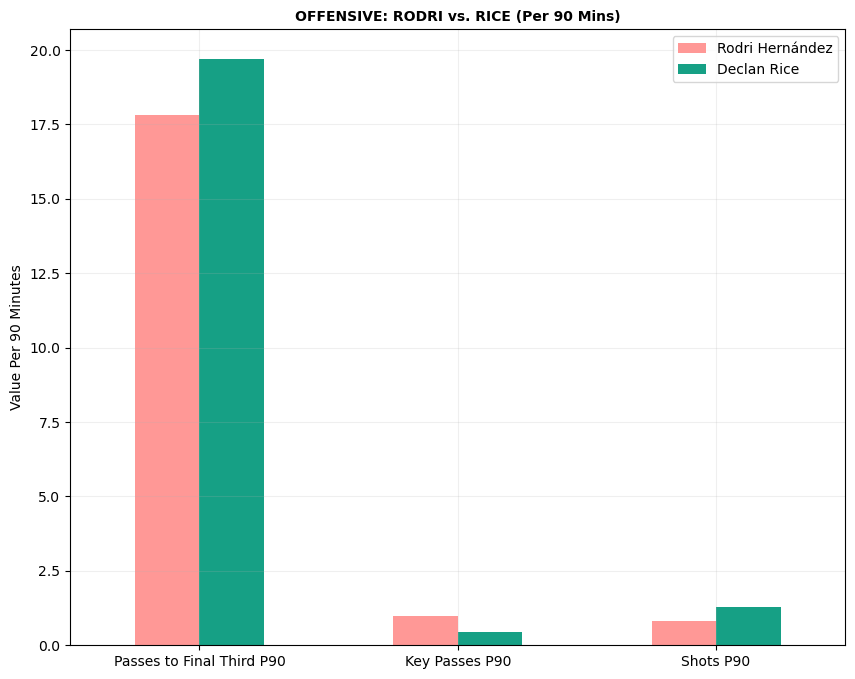

In [154]:
df_offensive_p90.T.plot(kind='bar', figsize=(10, 8), color=['#ff9896', '#16a085'])

plt.title('OFFENSIVE: RODRI vs. RICE (Per 90 Mins)', fontsize=10, fontweight='bold')
plt.xticks(rotation=360)
plt.legend()
plt.grid(True, alpha=0.2)
plt.ylabel("Value Per 90 Minutes")
plt.show()

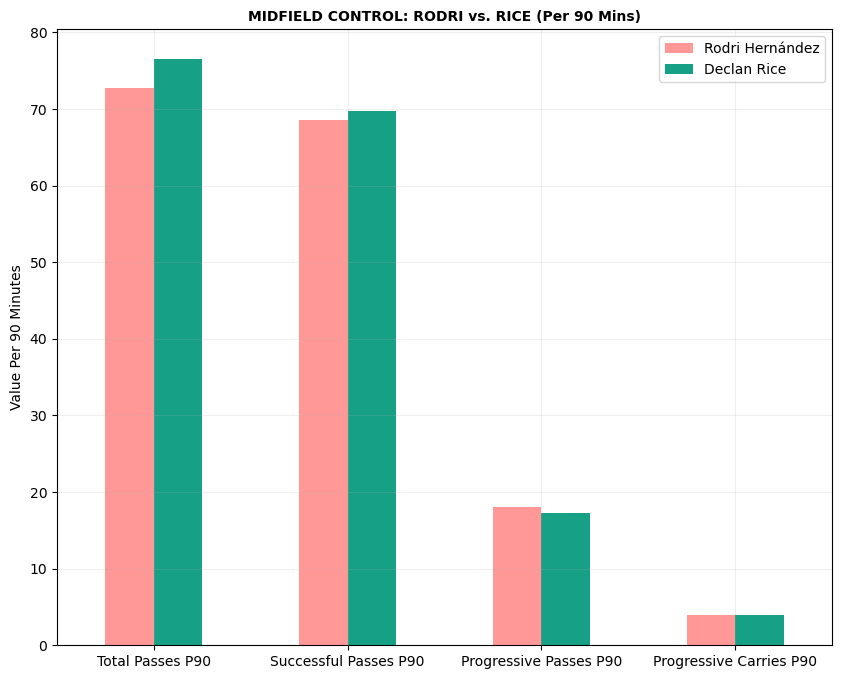

In [157]:
df_creation_p90.T.plot(kind='bar', figsize=(10, 8), color=['#ff9896', '#16a085'])

plt.title('MIDFIELD CONTROL: RODRI vs. RICE (Per 90 Mins)', fontsize=10, fontweight='bold')
plt.xticks(rotation=360)
plt.legend()
plt.grid(True, alpha=0.2)
plt.ylabel("Value Per 90 Minutes")
plt.show()

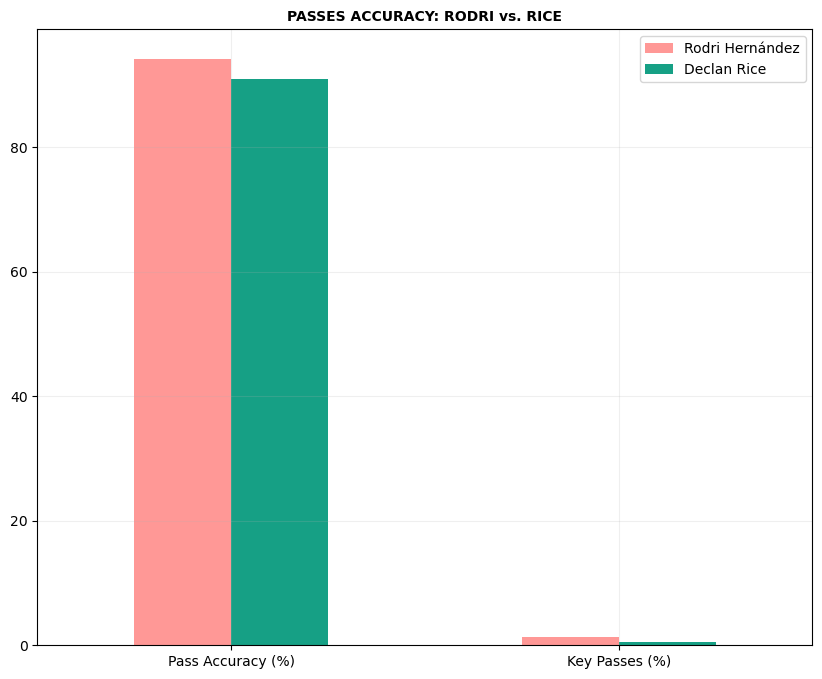

In [159]:
df_accuracy.T.plot(kind='bar', figsize=(10, 8), color=['#ff9896', '#16a085'])

plt.title('PASSES ACCURACY: RODRI vs. RICE', fontsize=10, fontweight='bold')
plt.xticks(rotation=360)
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

In [160]:
df_accuracy.head()

,Pass Accuracy (%),Key Passes (%)
Player,,
Rodri Hernández,94.27,1.38
Declan Rice,91.04,0.56


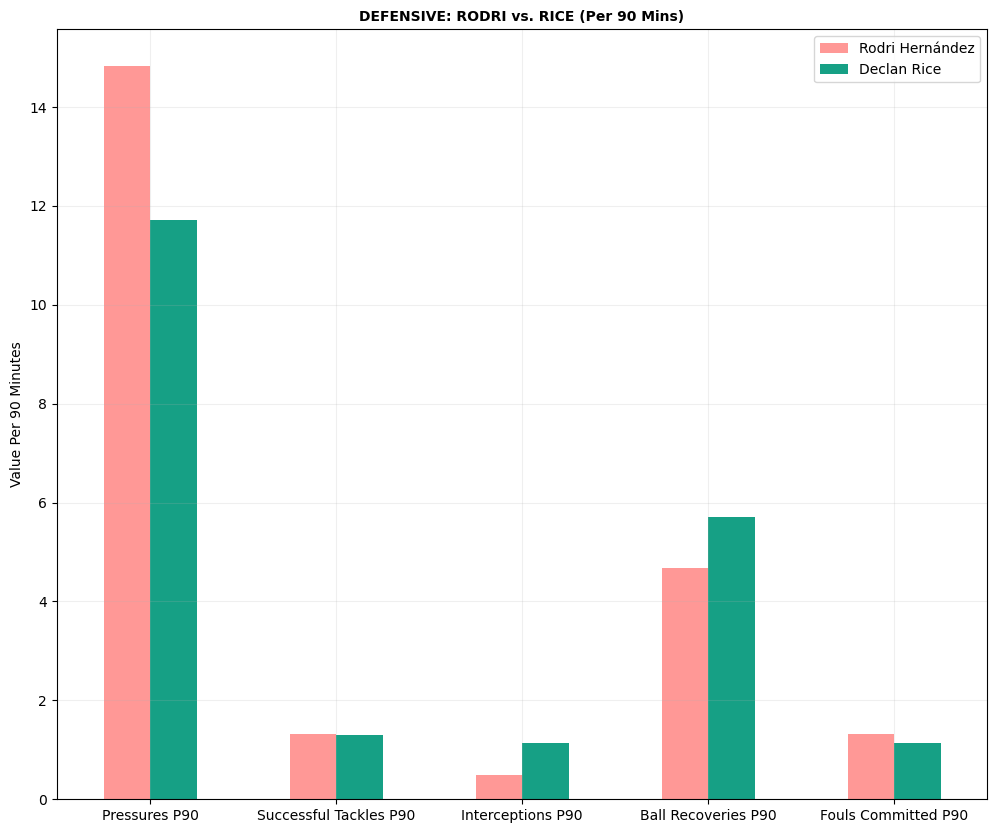

In [161]:
df_defensive_p90.T.plot(kind='bar', figsize=(12, 10), color=['#ff9896', '#16a085'])

plt.title('DEFENSIVE: RODRI vs. RICE (Per 90 Mins)', fontsize=10, fontweight='bold')
plt.xticks(rotation=360)
plt.legend()
plt.grid(True, alpha=0.2)
plt.ylabel("Value Per 90 Minutes")
plt.show()

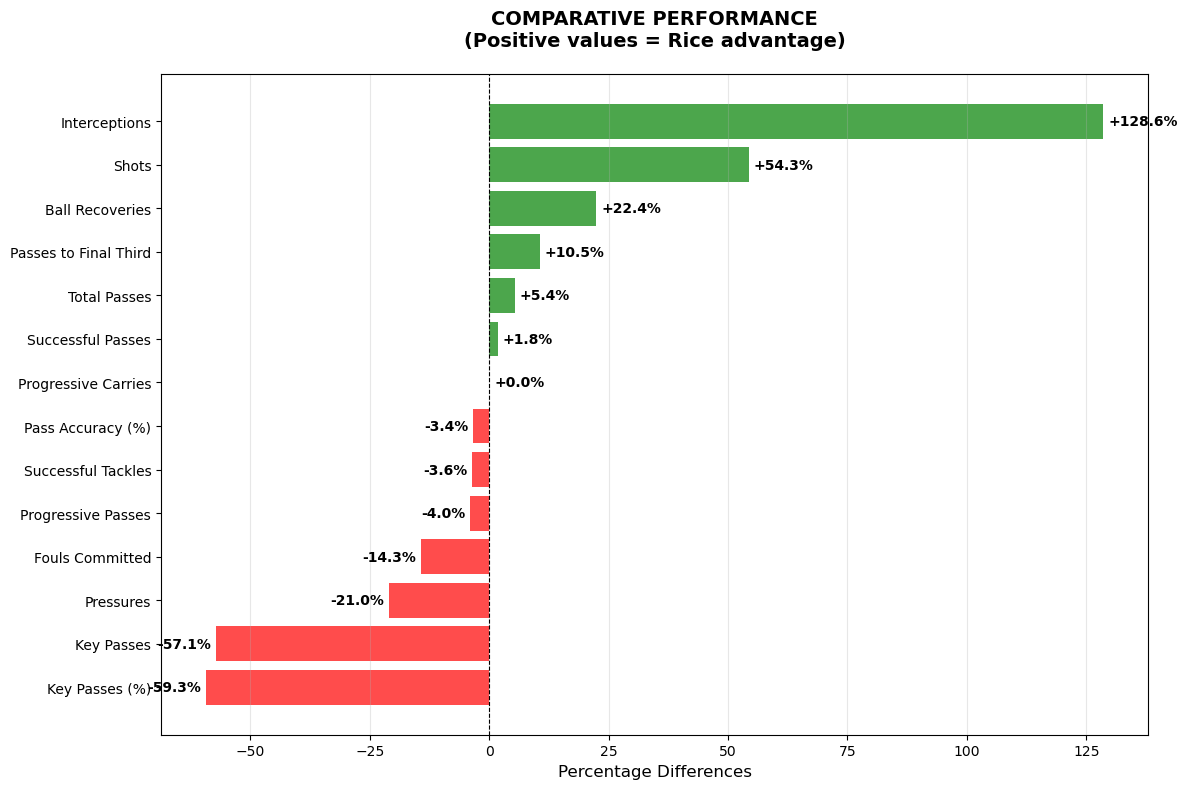

In [165]:
fig, ax = plt.subplots(figsize=(12, 8))

differences = []
labels_diff = []
for metrica in df_p90.columns:
    if metrica != ['Pass Accuracy (%)', 'Key Passes(%)']:
        rodri_val = rodri_data_p90[metrica]
        rice_val = rice_data_p90[metrica]
        if rodri_val != 0: 
            dif_percent = ((rice_val - rodri_val) / rodri_val) * 100
            differences.append(dif_percent)
            labels_diff.append(metrica.replace(' P90', ''))


sorted_indices = np.argsort(differences)
sorted_differences = [differences[i] for i in sorted_indices]
sorted_labels = [labels_diff[i] for i in sorted_indices]

colors_diff = ['red' if x < 0 else 'green' for x in sorted_differences]
bars = ax.barh(sorted_labels, sorted_differences, color=colors_diff, alpha=0.7)


for bar, valor in zip(bars, sorted_differences):
    ax.text(bar.get_width() + (1 if valor >= 0 else -1), 
            bar.get_y() + bar.get_height()/2,
            f'{valor:+.1f}%', 
            va='center', ha='left' if valor >= 0 else 'right',
            fontweight='bold', fontsize=10)

ax.axvline(x=0, color='black', linewidth=0.8, linestyle='--')
ax.set_xlabel('Percentage Differences', fontsize=12)
ax.set_title('COMPARATIVE PERFORMANCE\n(Positive values = Rice advantage)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


In [167]:
!pip install mplsoccer

In [169]:
import seaborn as sns  
from mplsoccer import Pitch

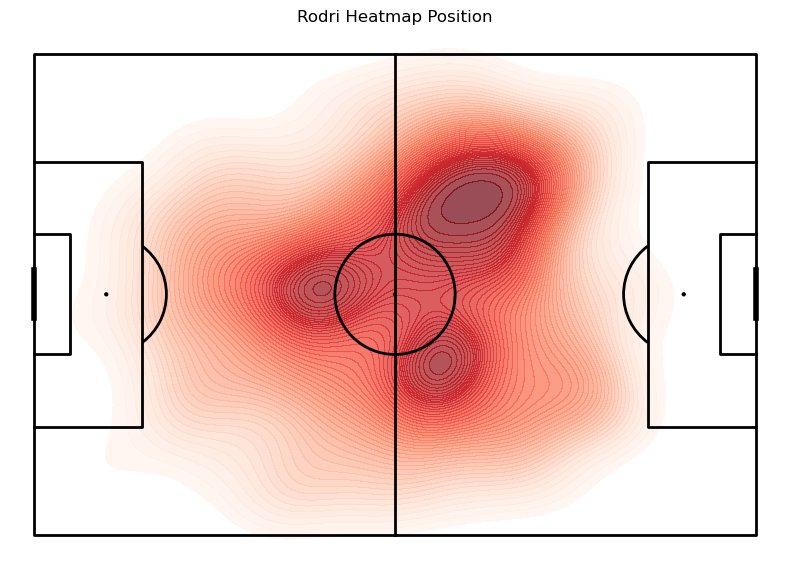

In [171]:
# RODRI HEATMAP LOCATION

rodri_locations = rodri_events['location'].dropna().apply(lambda x: x if isinstance(x, list) else None).dropna()
x = [loc[0] for loc in rodri_locations]
y = [loc[1] for loc in rodri_locations]

pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='white', line_color='black')
fig, ax = pitch.draw(figsize=(8, 6))

sns.kdeplot(
    x=x, y=y,
    fill=True,
    levels=50, 
    alpha=0.7,
    cmap="Reds",
    ax=ax
)

plt.title("Rodri Heatmap Position")
plt.show()


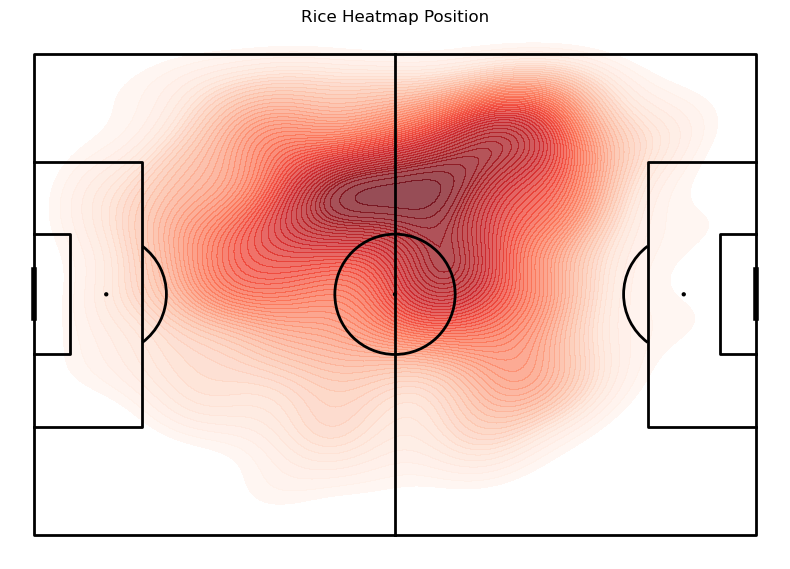

In [172]:
# RICE HEATMAP LOCATION

rice_locations = rice_events['location'].dropna().apply(lambda x: x if isinstance(x, list) else None).dropna()
x = [loc[0] for loc in rice_locations]
y = [loc[1] for loc in rice_locations]

pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='white', line_color='black')
fig, ax = pitch.draw(figsize=(8, 6))

sns.kdeplot(
    x=x, y=y,
    fill=True,
    levels=50,
    alpha=0.7,
    cmap="Reds",
    ax=ax
)

plt.title("Rice Heatmap Position")
plt.show()